In [50]:
import glob, os
import pandas as pd
from sklearn.metrics import precision_recall_curve
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 300)

import manu_main
from data_pipelines import model_input_builders
from displays import all_displays
from utils.util_functions import searchPostId 
from pycaret.classification import *
import matplotlib.pyplot as plt 

PROJECT_PATH='/Users/ofriedler/Dropbox/Work/Consultation/Manufuture/dev/manu_python'


In [2]:
all_tables_df = manu_main.get_all_tables_df()

Enriching wp_quotes with: competing_manufacturers, num_candidates, is_bid_chosen 
Enriching wp_manufacturers with: participation_count


In [3]:
ALL_FEATURES = ['country',
 'cnc_turning',
 'cnc_milling',
 'cnc_turning_milling',
 'conventional_turning',
 'conventional_milling',
 'sheet_metal_laser_cutting',
 'sheet_metal_press_break',
 'sheet_metal_punching',
 'sheet_metal_inserts',
 'sheet_metal_weldings',
 'batch_size_10',
 'batch_size_100',
 'batch_size_1000',
 'batch_size_9999',
 'preffered_type_assemblies',
 'preffered_type_full_turnkey',
 'plan',
 'one_manufacturer',
 'use_avl',
 'req_turning',
 'req_milling',
 'req_sheet_metal',
 'req_sheet_metal_inserts',
 'is_manuf_bid']
training_data = all_tables_df['train_manufacturer_project_bid_submit']
training_data = training_data[ALL_FEATURES]

In [4]:
exp_clf101 = setup(data = training_data, target = 'is_manuf_bid', session_id=123) 


,Description,Value
0,session_id,123
1,Target,is_manuf_bid
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15548, 25)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,24
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
model_collection = {}
os.chdir(PROJECT_PATH)
for file in glob.glob("*.pkl"):
    model_name = file[:-4]
    model_collection[model_name] = load_model(model_name)

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and 

# Model selection

In [6]:
print("Model options: " + str(model_collection.keys()))

Model options: dict_keys(['dt_2022-02-06', 'lr_2022-02-06', 'calib_sigmoid_ridge_2022-02-06', 'ridge_2022-02-06', 'Final RF Calibrated Model 05Feb2022', 'calib_isotonic_rf_2022-02-06', 'calib_sigmoid_tuned_Recall_dt_2022-02-06', 'calib_sigmoid_tuned_Recall_lr_2022-02-06', 'calib_isotonic_lr_2022-02-06', 'calib_isotonic_dt_2022-02-06', 'calib_sigmoid_tuned_Recall_rf_2022-02-06', 'tuned_Recall_svm_2022-02-06', 'calib_isotonic_ridge_2022-02-06', 'rf_2022-02-06', 'calib_sigmoid_rf_2022-02-06', 'calib_isotonic_tuned_Recall_rf_2022-02-06', 'tuned_Recall_lr_2022-02-06', 'calib_isotonic_svm_2022-02-06', 'tuned_Recall_dt_2022-02-06', 'calib_isotonic_tuned_Recall_svm_2022-02-06', 'svm_2022-02-06', 'tuned_Recall_ridge_2022-02-06', 'calib_sigmoid_svm_2022-02-06', 'calib_sigmoid_tuned_Recall_ridge_2022-02-06', 'tuned_Recall_rf_2022-02-06', 'calib_isotonic_tuned_Recall_ridge_2022-02-06', 'calib_sigmoid_lr_2022-02-06', 'calib_isotonic_tuned_Recall_dt_2022-02-06', 'calib_sigmoid_dt_2022-02-06', 'calib

In [43]:
selected_option = 'tuned_Recall_dt_2022-02-06'

In [44]:
model = model_collection[selected_option]

In [45]:
print(model)

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='is_manuf_bid',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=14,
     

# Predict on one project

In [56]:
project_post_id = 17792
model_input_one_project = model_input_builders.model_input_all_manufacturers_manufacturer_project_bid_submission_candidates(17792, all_tables_df)


In [47]:
unseen_predictions = predict_model(model, data=model_input_one_project)

In [58]:
pd.set_option('display.max_rows', 300)
unseen_predictions[['post_id_project', 'post_id_manuf',  'Score', 'Label' ]].sort_values(by=['Score'], ascending=True).head(100)


,post_id_project,post_id_manuf,Score,Label
25,17792,4753,0.5000,0
19,17792,2184,0.5000,0
29,17792,5450,0.7500,1
28,17792,5314,0.7500,0
8,17792,770,0.7500,1
24,17792,4740,0.7500,1
43,17792,15212,0.7931,0
54,17792,19924,0.8333,0
27,17792,5011,0.8333,0
14,17792,1266,0.8676,0


In [54]:
training_data = all_tables_df['train_manufacturer_project_bid_submit']
model_input_builders.manufacturer_project_bid_submission_labels(training_data)

In [55]:
list(training_data.columns)

['id_quote',
 'post_id_quote',
 'status_quote',
 'project',
 'agency_quote',
 'bids',
 'chosen_bids',
 'doc_sl',
 'doc_sf',
 'doc_ml',
 'doc_mf',
 'doc_int',
 'chosen_quote',
 'competing_manufacturers',
 'winning_manufacturers',
 'num_candidates',
 'is_bid_chosen',
 'id_project',
 'post_id_project',
 'status_project',
 'approval_date',
 'delivery_date',
 'agency_project',
 'engineer',
 'manufacturer',
 'vendor',
 'description',
 'parts',
 'plan',
 'time_to_bid',
 'time_to_quote',
 'time_to_production',
 'one_manufacturer',
 'use_avl',
 'req_certifications',
 'certifications_quote',
 'req_turning',
 'req_milling',
 'req_sheet_metal',
 'req_sheet_metal_inserts',
 'req_materials',
 'req_inspections',
 'req_batches',
 'excluded_manufacturers',
 'bids_manufacturers',
 'time_to_po',
 'quote',
 'manufacturers',
 'name',
 'use_certifications',
 'winning_bids',
 'sent_to_mf',
 'sent_to_engineer',
 'avls',
 'notif_quote',
 'draft_manufacturers',
 'delivery_date_int',
 'delivered_on',
 'is_iai',


In [57]:
model_input_from_training_one_project = training_data[training_data[post_id_project] == project_post_id]

NameError: name 'post_id_project' is not defined

In [ ]:
predictions_for_projects = predict_model(model, data=model_input_one_project)

In [ ]:
predictions_for_projects

In [49]:
df = unseen_predictions.groupby(['Label'])[['Score', 'is_manuf_bid']].agg({'Score': 'mean', 'is_manuf_bid': ['count', 'sum']})


KeyError: "Columns not found: 'is_manuf_bid'"

In [ ]:
precision_recall_curve(unseen_predictions['is_manuf_bid', 'Score'])

Manufacturer ID: 5011


,id,post_id,vendors,street,house,city,zip,country,employees_num,irs,...,certifications,qa_lab_capability_desc,traceability_system,sqe_team_and_supplier_quality_policy,quality_system_desc,company_id,currency,international,shipping_cost,participation_count
27,43,5011,105,Gan Rave st,1,Yavne,99999,IL,6-20,,...,[5012],,,,,512130493,ILS,0,None,67.0


Total number of bids: 67.0


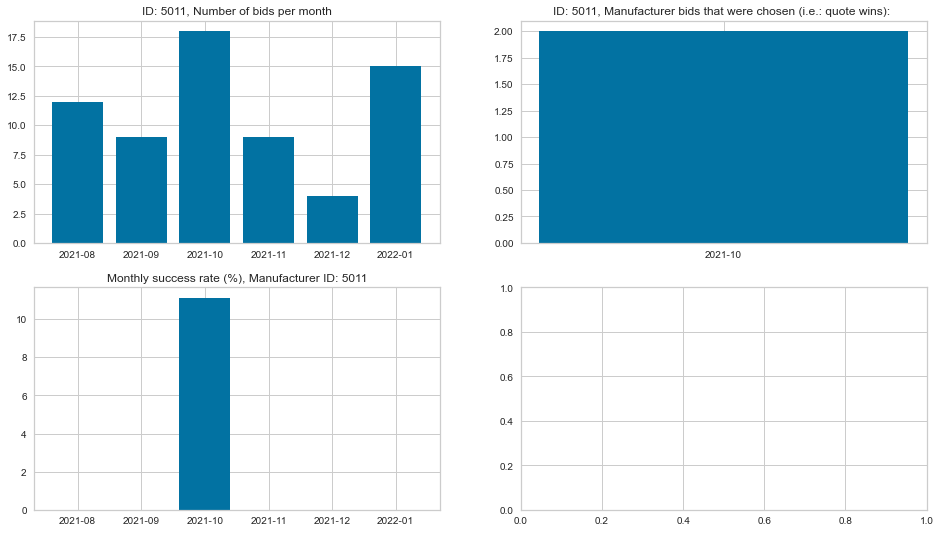

In [19]:
# manufacturer dashboard 
all_displays.manufacturer_dashboard(all_tables_df, 5011)